In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import copy

In [12]:
booking_growth = pd.read_csv('booking_growth.csv')
cancellations = pd.read_csv('cancellations.csv')
hotel_bookings = pd.read_csv('hotel_bookings.csv')

# Modification to datatypes
booking_growth['booking_date'] = pd.to_datetime(booking_growth['booking_date'])

1. Write a Python function to calculate the revenue generated per city from a dataset of hotel bookings stored in a CSV file. Each row contains columns: city, room_price, and number_of_nights.

In [7]:
revenue_generated = hotel_bookings.copy()
revenue_generated["revenue"] = (
    revenue_generated['room_price'] 
    * revenue_generated['number_of_nights']
)
revenue_generated.groupby(
    ["city"], as_index=False
)['revenue'].sum()

,city,revenue
0,Chicago,51467
1,Houston,62625
2,Los Angeles,43513
3,Miami,53663
4,New York,56076


2. Write a Python program to find the city with the highest growth in bookings month-over-month using a dataset with columns: city, booking_date, and number_of_bookings.

In [ ]:
growth_per_month = booking_growth.copy()
growth_per_month["month"] = booking_growth['booking_date'].dt.month
growth_per_month = growth_per_month.groupby(
    by=['city', 'month'], as_index=False
)['number_of_bookings'].sum()
growth_per_month['previous_month_bookings'] = (
    growth_per_month["number_of_bookings"].shift(1)
)
growth_per_month['growth_in_bookings'] = (
    (growth_per_month['number_of_bookings'] 
     - growth_per_month['previous_month_bookings'])
)
growth_per_month
growth_per_month[(growth_per_month['growth_in_bookings'] 
                  == growth_per_month['growth_in_bookings'].max())]

,city,month,number_of_bookings,previous_month_bookings,growth_in_bookings
0,Chicago,1,198,NaN,NaN
1,Chicago,2,309,198.0,111.0
2,Chicago,3,244,309.0,-65.0
3,Chicago,4,195,244.0,-49.0
4,Chicago,5,115,195.0,-80.0
5,Chicago,6,180,115.0,65.0
6,Chicago,7,173,180.0,-7.0
7,Chicago,8,317,173.0,144.0
8,Chicago,9,144,317.0,-173.0
9,Chicago,10,222,144.0,78.0


3. Create a Python script to calculate the percentage of cancellations for each property from a dataset containing columns: property_id, booking_status (confirmed/cancelled).

In [42]:
percentage_cancellations = cancellations.copy()
percentage_cancellations['confirmed'] = (
    percentage_cancellations['booking_status'] == "confirmed"
)
percentage_cancellations = percentage_cancellations.groupby(
    "property_id", as_index=False
).agg(
    {
        "booking_status": "count",
        "confirmed": 'sum'
    }
)
percentage_cancellations['percentage'] = (
    percentage_cancellations['confirmed']
    / (percentage_cancellations['booking_status']
       - percentage_cancellations['confirmed']) 
)
percentage_cancellations.fillna(0, inplace=True)
percentage_cancellations[['property_id', 'percentage']]

,property_id,percentage
0,P1,0.750000
1,P10,2.800000
2,P11,1.333333
3,P12,2.000000
4,P13,2.200000
5,P14,3.333333
6,P15,4.500000
7,P16,5.000000
8,P17,2.500000
9,P18,3.250000


4. Write a Python function to identify properties with unusually high cancellation rates using the Z-score method on the cancellation percentage.

In [31]:
mean_percentage = percentage_cancellations['percentage'].mean()
standard_deviation = percentage_cancellations['percentage'].std()

high_cancellation_rates = percentage_cancellations[
    ['property_id', 'percentage']
].copy()
high_cancellation_rates['z-score'] = (
    (high_cancellation_rates['percentage'] - mean_percentage)
    / standard_deviation
)
high_cancellation_rates.sort_values(
    by='z-score', ascending=False
)

,property_id,percentage,z-score
7,P16,5.000000,2.265650
6,P15,4.500000,1.807679
11,P2,4.000000,1.349707
5,P14,3.333333,0.739079
9,P18,3.250000,0.662750
13,P3,3.200000,0.616953
1,P10,2.800000,0.250576
8,P17,2.500000,-0.024207
17,P7,2.400000,-0.115801
14,P4,2.333333,-0.176864


5. Write a Python program to plot a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn.

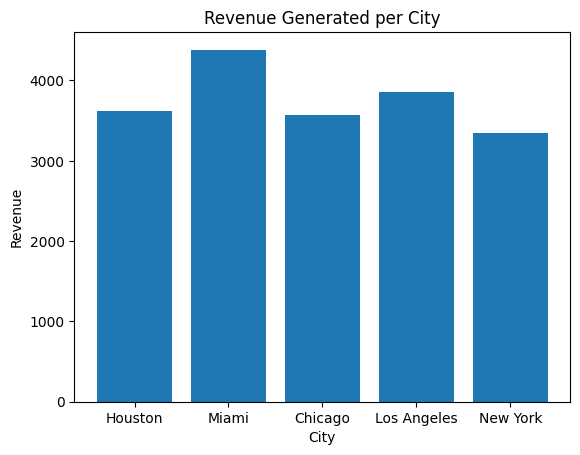

In [43]:
plt.bar(revenue_generated["city"], 
        revenue_generated["revenue"])
plt.title("Revenue Generated per City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()      